# Project: Investigate a Dataset (TMDB Movie Dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  The TMDb movie data contains over 10,000 movies with about 10866 rows and 20 columns. It was originally cleaned from Kaggle. 

>  The gathered columns include the following * id, *imdb_id, *popularity, *budget, *revenue, *original_title, *cast, *homepage, *director, *tagline, *keywords, *overview, *runtime, *genres, *production_companies, *release_date, *vote_count, *vote_average,* release_year, *budget_adj, *revenue_adj. The dataset generally displays user ratings, movie popularity and revenue generated across years.



Questions for Analysis



> Which genres are the most popular?

> Which genres are the 10 least popular?

> Which director produces the top 5 most popular movies?

> Which keywords attract 10 most popularity?

> What keywords attract 10 Least popularity?

> Which year has the most movie been released?



In [1]:
# Import useful libraries for the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Include a 'magic word' so that your visualizations are plotted

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will be loading in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.



In [2]:
#Loading the movie data set and exploration
df = pd.read_csv('tmdb-movies.csv')


In [3]:
#Inspecting the top 5 data set
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Returning the shape of data set
df.shape

(10866, 21)

In [5]:
#Exploring the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the information gathered from the movie dataset, we have missing values in cast, hompepage, director, tagline, keywords, overview, genres and production_companies.

Its also noticed that release_year is a string, this would be converted subsequently to datetime function.

In [6]:
#Identifying the number of missing values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Here we found the exact number of rows missing, this would be explored further in the EDA section.

### Data Cleaning of TMDB Movies

Cleaning of the TMDB movie dataset

I will clean up all duplicated movies and drop them.
I will also drop 'imdb_id' columns because it serve as unique identifier for various movies.

The 'homepage' 'tagline' and 'overview' columns provide the https and location of the movies as well as a brief synopsis of each movies, for these analysis, I will be droppping them.

The underlisted rows in the dataframe with null values will be deleted because of the information gotten from the dataset, we have:

Cast (76): This literarily shows that there were no actors in the movies, as such no movies. 

Director (44): This shows that the movie was not coordinated by anyone.

Genres (23): This also shows that the movie does not fall under any category of genre.

Production companies (1030): This shows that no company worked to produce the movies. 

The release_date displays string, this will be converted to datetime.

In [7]:
#Checking for duplicated values
sum(df.duplicated())


1

In [8]:
#drop duplicated values
df.drop_duplicates(inplace=True)

In [9]:
#Verifying if duplicate values are dropped
sum(df.duplicated())

0

Dropping columns not important for the analysis

In [10]:
#removing unwanted columns
df.drop(columns=['id', 'imdb_id', 'homepage', 'tagline', 'overview'], inplace=True)

Dropping all missing row values across cast, director, genres and production_companies

In [11]:
df.dropna(subset=['cast', 'director', 'genres', 'production_companies'], inplace=True)

Setting the release_date  as datetime object 

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])

Removal of pipes (|) from the underlisted columns into a Python list.

director,
cast,
genres,
production companies,
keywords

In [13]:
for column in ['cast', 'genres', 'director', 'keywords', 'production_companies']:
    df[column] = df[column].str.split('|')


Inspection of data after cleaning, inspect the shape of the dataframe, return 2 row, get information for data cleanliness before analysis

In [14]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [15]:
df.shape

(9772, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   budget                9772 non-null   int64         
 2   revenue               9772 non-null   int64         
 3   original_title        9772 non-null   object        
 4   cast                  9772 non-null   object        
 5   director              9772 non-null   object        
 6   keywords              8666 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

From the information retrieved, keywords still have some missing values that need to be forward filled with observation

In [17]:
df.fillna(method='ffill', inplace=True)

In [18]:
#Inspecting if the above code ran successfully
df.isnull().sum()


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Replace all the zero values on budget, revenue and runtime for proper analysis

In [19]:
column = ['budget', 'revenue', 'runtime']
df[column] = df[column].replace({0: df[column].mean()})

In [20]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
#Re-verifying movie dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   budget                9772 non-null   int64         
 2   revenue               9772 non-null   int64         
 3   original_title        9772 non-null   object        
 4   cast                  9772 non-null   object        
 5   director              9772 non-null   object        
 6   keywords              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

> Compute statistics and create visualizations while answering questiona posed in the Introductory section.

### Research Question 1 (Which genres are the 10 most popular?)

In [22]:
# Explore data statistics
df.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


From the statistics, 
* We have the range of popularity from 0 to 32. 
* Highest movie released by release_year is 2015.
* Recorded an average vote 0f 9772
* Average popularity of 0.695 and count of 9772

Creating a function to solve the questions posed in introduction

In [23]:
def flow(col, join):
    return (df[[col, join]].explode(col)
    .groupby(col)[join]
                    .mean())


In [24]:
#Sorting the genres and popularity data in descending order
genre_popularity = flow('genres', 'popularity').sort_values(ascending = False)
genre_popularity

genres
Adventure          1.209053
Science Fiction    1.065278
Fantasy            1.056310
Action             0.968256
Animation          0.914281
Family             0.846467
Thriller           0.772172
Crime              0.767337
War                0.752777
Mystery            0.713596
Comedy             0.631565
Romance            0.627178
Drama              0.625878
History            0.609500
Western            0.604554
Music              0.550884
Horror             0.480207
TV Movie           0.295864
Documentary        0.217167
Foreign            0.209384
Name: popularity, dtype: float64

In [25]:
def genre_popularity_visual(dfr,title):
    dfr.plot(kind = 'barh', figsize = (12, 8))
    plt.ylabel('Genres')
    plt.xlabel('Popularity')
    plt.title(title);

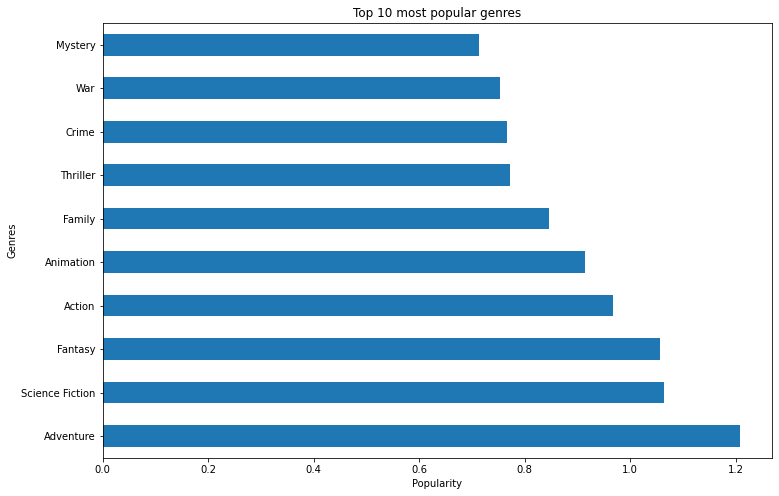

In [26]:
#Visualization of genre vs popularity
genre_popularity_visual(genre_popularity.head(10), 'Top 10 most popular genres')

From the visualization, it is clear that Adventure has the highest popularity, followed by Science Fiction, an then Fantacy  

### Research Question 2 (Which genres are the 10 least popular?)

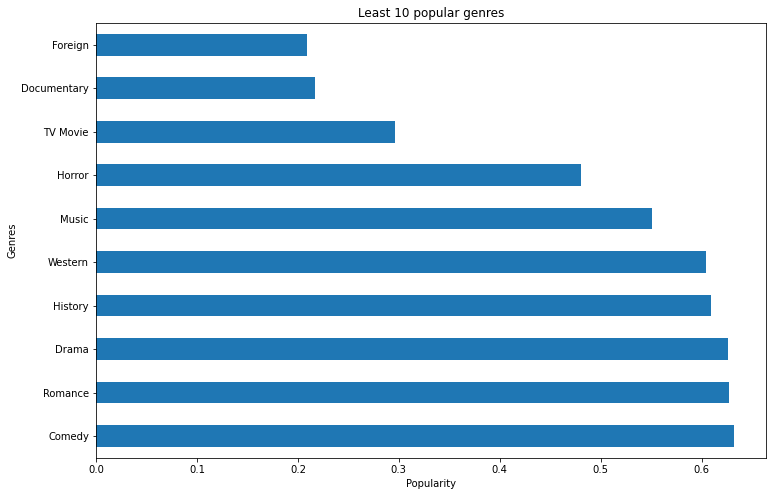

In [27]:
#visualization of least genre versus popularity
genre_popularity_visual(genre_popularity.tail(10), 'Least 10 popular genres' )

It is proven that Foreign, Documentary and TV Movie are the least popular from the movie dataset

### Research Question 3 (Which director produces the top 5 most popular movies?)

In [28]:
#Inspect dataframe
director_popularity = flow('director', 'popularity').sort_values(ascending = False)
director_popularity

director
Colin Trevorrow      16.696886
David Leitch         11.422751
Chad Stahelski       11.422751
Alan Taylor           6.883129
Christopher Nolan     6.865185
                       ...    
Ken Burns             0.001783
Stephen Cragg         0.001423
Nacho G. Velilla      0.001317
Dibakar Banerjee      0.001115
Pascal Thomas         0.000973
Name: popularity, Length: 4758, dtype: float64

In [29]:
#Creating a function
def director_popularity_visual(dfr,title):
    dfr.plot(kind = 'bar', figsize = (12, 8))
    plt.xlabel('Director')
    plt.ylabel('Popularity')
    plt.title(title);

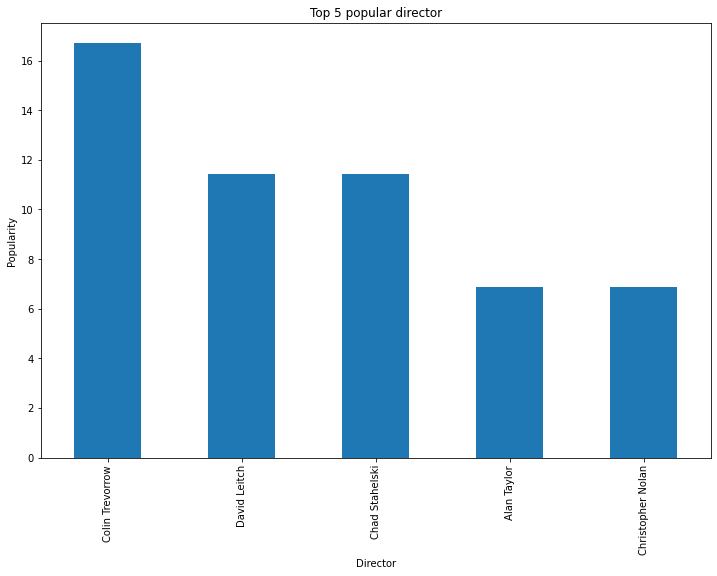

In [30]:
#visualization of 5 most popular directors
director_popularity_visual(director_popularity.head(5), 'Top 5 popular director' )

Colin Trevorrow is the most popular director, along side David Leitch as seen in the bar representation.

### Research Question 4 (Which keywords attract more popularity?)

In [31]:
#Inspect dataframe
keyword_popularity = flow('keywords', 'popularity').sort_values(ascending = False)
keyword_popularity

keywords
velociraptor                11.121115
nihilism                     8.947905
scene during end credits     7.963322
space colony                 7.460604
evil mastermind              7.404165
                              ...    
wrongful arrest              0.001783
serial rapist                0.001783
t-horror                     0.001423
rape victim                  0.001372
malpratice                   0.000188
Name: popularity, Length: 7578, dtype: float64

In [32]:
#Creating a function
def keyword_popularity_visual(dfr,title):
    dfr.plot(kind = 'bar', figsize = (12, 8))
    plt.xlabel('Keyword')
    plt.ylabel('Popularity')
    plt.title(title);

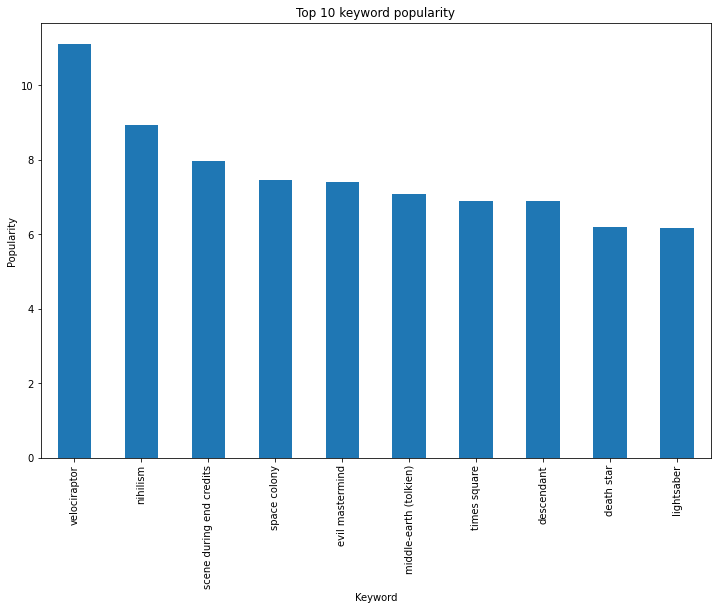

In [33]:
#Visualization of top 10 popularity keyword
keyword_popularity_visual(keyword_popularity.head(10), 'Top 10 keyword popularity')

The ten (10) most popular movie keywords are displayed above with Velociraptor being the most popular keyword used in the TMDB dataset

### Research Question 5 (What keywords attract 10 Least popularity?)      

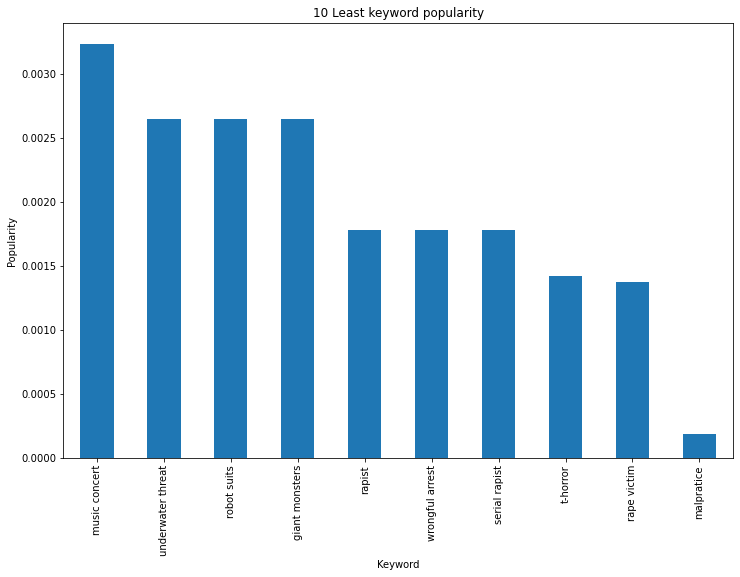

In [34]:
#Visualization of least 10 popularity keyword
keyword_popularity_visual(keyword_popularity.tail(10), '10 Least keyword popularity')

Malpractice is evident attracted the least popularity


### Research Question 6 (Which year has the most movie been released?)  



In [35]:
df_yrmc = df.groupby('release_year').count()['budget'].sort_values(ascending = False) #grouping the year by count
df_yrmc.head() #display 5 rows

release_year
2014    635
2013    567
2015    558
2012    498
2009    474
Name: budget, dtype: int64

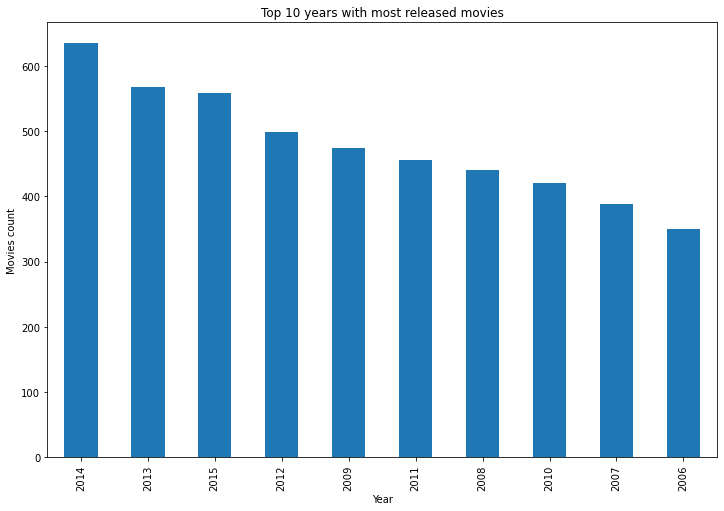

In [36]:
#Visualization 
df_yrmc.head(10).plot(kind = 'bar', figsize = (12,8))
plt.xlabel('Year')
plt.ylabel('Movies count')
plt.title ('Top 10 years with most released movies');





<a id='conclusions'></a>
## Conclusions


The TMDB movie dataset is a collection of unclean data. The data wrangling was a pretty tricky and time consuming with so much zero's while checking the data statistics. The data has only one duplicated value with major zero in budget and revenue columns respectively.I had to drop the NULL values because their size doesn't affect the dataset but couldn't drop the zero valued data points of budget, revenue and runtime because it has positive impact in the overall dataset. To drop them means losing half of the data points collected. Instead, I filtered out the data points with zero values for both budget and revenue columns and filled them with the mean. To make the distribution seam and easy, I computed the mean of budget, revenue and runtime columns for each release_year, and filled the data points with their respective release_year. Most data with the budget values of zeros got dropped because they had no revenue values.

From the analysis, the director with the top popularity is Colin Trevorrow .

In general, its quite challenging handling a project on Python for the first time but its worth it though